  EDA: Current project 32 unique users. Plot out Distribution of number tweets for each user. 
  
  Bar plot for distribution of number tweets per user.

Height of bar should be number of tweets they have.
 
 Some users have less than 100 tweets, drop these users.Drop less than 10k users. 
 
 Further look at userid, and tweet text. Look at text part and then figure process(bag of 
 
 words)
 
 Use this as X. Use this in train test split.
 
 Try first naive bayes model in skilearn for labels. Then print out metrics.
 
 after:
 Decision Tree simple(default parameters)
 
 Gausian Bayes:
 
 Look into what it actually does
 
 then calculate accuracy score.
 
 Use cross validation. Five folds. 
 
 If you need go back to lecture(solution in solution sheet for how to do all this).
 
 Don't use max features
 
 Look into functions. Understand what expected output should be.
 
 Learn Acronyms.
  
  In guide sent by flora, replace count vectorizer with tfidf. 
  
  if i have time, look at Naive Bay. Multiclass?
  
  y = must be string or object
  
  
  
  
Go back to NLP week and try and do assignment. Individual and pair assignment and compare to 

solution.  
  
  Floras last words:
  
  Be patient and go deep. Make sure each step, "what am I doing?"
  
  Always check. 'Wait a second let me check.'
  
  Use weekend pace yourself. Back up what you say. If you say you understand the topic 
  
  modeling understand everything. If you say you understand tfidf no the acronym. 
  
  Go back to lecture and really own it. "If asked to give lecture on Bayes, be able to, own 
  
  it".
  
  Saturday: 8pm. show what file worked on. 
  
  Flora: "why are they taking this step, why this assumption, purpose of this step?"
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  
  

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import random
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tag import StanfordNERTagger
from nltk.tokenize import sent_tokenize
from nltk.tokenize import sent_tokenize


import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from nltk import word_tokenize, pos_tag
from nltk.tag import StanfordNERTagger
from sklearn.linear_model import RidgeClassifier
# from tweetokenize import Tokenizer


import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import normalize
from sklearn import preprocessing
from nltk.tag.stanford import StanfordNERTagger
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import pandas as pd

import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
from autocorrect import spell


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alessandro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alessandro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load in Data

In [2]:
df = pd.read_csv('/Users/alessandro/Downloads/venezuela_201906_1_tweets_csv_hashed.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Inspecting userids

In [3]:
df.userid.value_counts()

568620329                                       43231
801485278858854401                              39421
801200139155214336                              34912
801555575687495681                              33503
801463213833547776                              32870
751630413769113601                              31657
751635009052827648                              31073
881675624401833984                              27436
761401522798333952                              27209
892133369965944833                              26370
769380097359024128                              26136
768237282562310144                              26020
896121971989262336                              25472
778257194076831744                              22624
741092772233482241                              16400
801221525718335488                              12618
772513370599747585                              12099
801442896041873409                              12025
741112500356276225          

In [4]:
df.user_screen_name.value_counts()

NoticiasViralTV                                 43231
EvelynWhiteGOP                                  39421
TrumpNewsz                                      34912
TrumpDailyNewss                                 33503
TrumpNewsDaily_                                 32870
AriaWilsonGOP                                   31657
CarolineWalkerB                                 31073
DTrumpTrain_                                    27436
AbbyMartinM                                     27209
Laureen4Trump                                   26370
TrumpTrainNewss                                 26136
GODBLESSAMERIC                                  26020
EmmaTurnerBN                                    25472
America4Trump_                                  22624
LaurenJonesGOP                                  16400
AlyssaNelsonR                                   12618
Sophia4Trump                                    12099
SamanthaClarkH                                  12025
SophiaMillerC               

In [5]:
len(df.user_screen_name)

569455

# Taking out retweets and non English tweets

In [6]:
tweets_mask = df['is_retweet'] == False
tweets = df[tweets_mask]

tweets_english = tweets[tweets['tweet_language'] == 'en']

# Dropping Users with less than 10,000 tweets

# Dropping screen names the ghetto way because other methods I couldn't get to work

In [7]:
data = tweets_english[['user_screen_name','tweet_text']]
data =data[data.user_screen_name != 'CarolineWB_']
data =data[data.user_screen_name != '55DeTN4VJIeKfM9Atr0sSTLomZbJyUWuBNdDK2an1nE=']
data =data[data.user_screen_name != 'TDgi60XrT+ylS+rVJEMhb4Y2qzW2HnZmlijAyHNqavc=']
data =data[data.user_screen_name != '944Ry+vVZhaSln1T9ctgWQ6N5g45ReoWpWSXfrgKFc=']
data =data[data.user_screen_name != 'UaoSsTUDoR7SIA0dvPLYLRt70LG0VUSS3AcrE9FUE=']
data =data[data.user_screen_name != 'MUqZv6hxFW92V7lxJyf35c8BU8esdxS6IoV1QGiwwtQ=']
data =data[data.user_screen_name != 'TRUMPTRAIN_17']
data =data[data.user_screen_name != '_trumpnews_']
data =data[data.user_screen_name != 'EAMY+7SRc0r53i1vfKV4UvVAc+DAI4rtEpUjFSbwbQ=']
data =data[data.user_screen_name != 'AnnabelleBakerF']
data =data[data.user_screen_name != 'BreakingNewsDJT']
data =data[data.user_screen_name != 'Citizens4Trump_']
data =data[data.user_screen_name != 'NoticiasViralTV']







In [8]:
len(data.user_screen_name.value_counts())

20

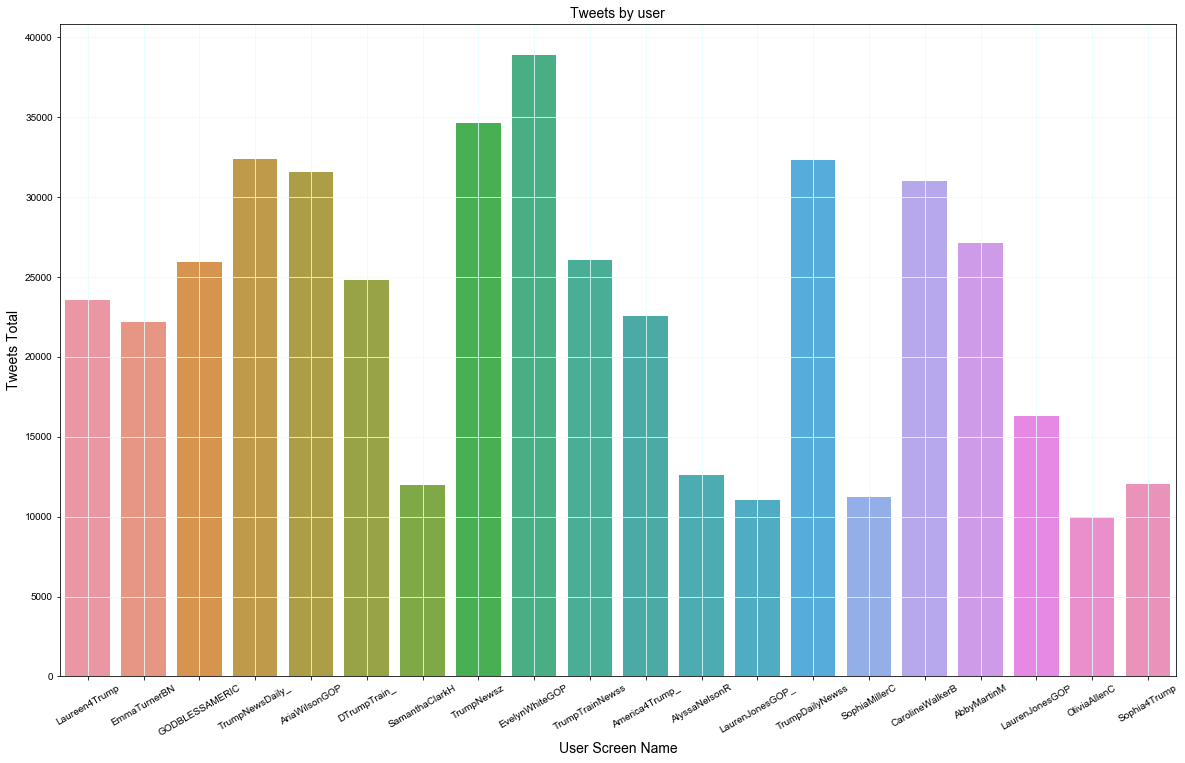

In [9]:
plt.figure(figsize=(20,12))
ax = sns.countplot(x='user_screen_name', data=data)
sns.set(style='darkgrid')

plt.ylabel('Tweets Total', fontsize = 14)
plt.xlabel('User Screen Name', fontsize = 14)
plt.title('Tweets by user', fontsize = 14)
plt.grid(c = 'lightcyan')

# import seaborn as sns
# planets = sns.load_dataset("planets")
# g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


plt.show ()

In [25]:
data_toy = data[:500]
data_toy

,user_screen_name,tweet_text
1,Laureen4Trump,"BREAKING: Air Force Makes Tragic Announcement,..."
2,Laureen4Trump,HAPPENING NOW: Disney Facing a Scandal So Cata...
3,EmmaTurnerBN,Another Stupid Gun Control Cartoon From the Le...
4,GODBLESSAMERIC,➡️ 90 POUNDS OF COCAINE FOUND ON SHIP OWNED BY...
5,GODBLESSAMERIC,"Michael Moore Offers to Pay $1,000 Fine for El..."
6,GODBLESSAMERIC,Nancy Pelosi to Continue to Lead House Democra...
7,GODBLESSAMERIC,WATCH: 9 Pro-Trump States Just DEFIED Illegal ...
8,GODBLESSAMERIC,"Stupid Hillary Gives Away Mosul Strategy, ISIS..."
9,GODBLESSAMERIC,HILLARY CLINTON ONE LAST HURRAH https://t.co/y...
10,GODBLESSAMERIC,Former CIA Director Said More Than 1 Country C...


# Processing Tweets to do Train Test Split

In [16]:
from autocorrect import spell


# Extremely Slow (seriously waited 30 minutes for no results)

In [27]:



data1 = []

for i in range(data_toy.shape[0]):
    tweet = data.iloc[i, 1]

    # remove non alphabatic characters
    tweet = re.sub('[^A-Za-z]', ' ', tweet)

    # make words lowercase, because Go and go will be considered as two words
    tweet = tweet.lower()

    # tokenising
    tokenized_tweet = wt(tweet)

    # remove stop words and stemming
 
    tweet_processed = []
    for word in tokenized_tweet:
        if word not in set(stopwords.words('english')):
            tweet_processed.append(spell(stemmer.stem(word)))

    tweet_text = " ".join(tweet_processed)
    data1.append(tweet_text)


KeyboardInterrupt: 

In [54]:
df.dropna(inplace=True)


In [55]:
data.shape

(458305, 2)

# Anastasias Pipeline is much quicker with same results

In [56]:
### Creating a function to clean_up the twitter_text
#### ALL WORKS!!!!
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

#Additional
import string
string.punctuation

# In this edit I didn't remove # and @ hoping to find the way to remove it together with the followings
punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')
punct.add('🇺🇸')
punct.add('🤢')

lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

import preprocessor as p
import re

def preprocessing_text(text):
    '''
    INPUT: str
    OUTPUT: str w/ emojies, urls, hashtags and mentions removed
    '''
    p.set_options(p.OPT.EMOJI, p.OPT.URL, p.OPT.HASHTAG, p.OPT.MENTION, p.OPT.NUMBER)
    clean_text = p.clean(text)
    
    return clean_text

def remove_symbols(word, symbol_set):
    
    '''
    Removing symbols from word
    '''
    return ''.join(char for char in word 
                    if char not in symbol_set)
def clean_tweet_text(text_column):
    '''
    takes a columns in dataframe with tweets text: 
    Outputs: PD Series of tokenized docs
    lower case, 
    symbol_set charachters removed
    punctuation removed
    words stemmed and lemmatized
    
    '''
    
    
    # converting from pd to list
    corpus = text_column.values.tolist()
    
    #Removing all HTTPs
    docs_no_http = [ re.sub(r'https?:\/\/.*\/\w*', '', doc) for doc in corpus ]
    #First ---> tokenize docs
    tokenized_docs = [doc.split() for doc in docs_no_http]
    # Lower case words in doc
    tokenized_docs_lowered  = [[word.lower() for word in doc]
                                for doc in tokenized_docs]

    # Removing punctuation from docs
    cleaned_docs = [[remove_symbols(word, punct) for word in doc] 
                    for doc in tokenized_docs_lowered]

    ### Removing stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    docs_no_stops = [[word for word in doc if word not in stop_words] 
                     for doc in cleaned_docs]
    # Lemmatize words in docs
    docs_lemmatized = [[lemmer.lemmatize(word) for word in doc]
                      for doc in docs_no_stops]
    
    # Stem words in docs
    docs_stemmed = [[stemmer.stem(word) for word in doc]
                      for doc in docs_lemmatized]
    
    # Removes mentions, emotions, hashtags and emojies
    docs_no_mentions = [preprocessing_text(' '.join(doc)) for doc in docs_stemmed]
    
    bag = []
    for doc in docs_no_mentions:
        if len(doc) >= 2:
            bag.append(doc)
    
    # converts into list of lists
    bow = [list(tweet.split(' ')) for tweet in bag]
    
    
    # convert docs into pd series
    full_service_docs_series = pd.Series( (v[0] for v in bow) )
    
    return bag, bow, docs_stemmed, full_service_docs_series

In [57]:
tweet_full_bag_english, tweet_full_bow_english, tweet_full_docs_stemmed_english, tweet_english_full_service_doc_series = clean_tweet_text(data['tweet_text'])


In [51]:
tweet_full_bag_english

['break air forc make tragic announc pleas pray',
 'happen disney face scandal catastroph could ruin forev',
 'anoth stupid gun control cartoon left',
 '️ pound cocain found ship own rino antidrug senat',
 'michael moor offer pay fine elector turn trump',
 'nanci pelosi continu lead hous democrat glorious defeat',
 'watch protrump state defi illeg immigr brilliant new law',
 'stupid hillari give away mosul strategi isi leaf attack anoth citi',
 'hillari clinton one last hurrah',
 'former cia director said countri could respons hack',
 'watch – countri singer ray steven releas song expos voter fraud – it going…',
 'trey gowdi made major move stop obama shadow govern',
 'alert top antitrump republican took money sorosalign group',
 'knockknock look got visit secret servic',
 'lawrenc hurrican irma harvey result “mother natur rage wrath”',
 'live stream video roger stone associ jacob engel live florida courthous',
 'new speaker pelosi refus rule impeach trump',
 'updat fort lauderdal airp

In [66]:
print(X.shape)
print(y.shape)

(458267, 1000)
(458305,)


# I spoke too soon.. This pipeline drops some tweets for some reason

In [58]:
def remove_symbols(word, symbol_set):
    
    '''
    Removing symbols from word
    '''
    return ''.join(char for char in word 
                    if char not in symbol_set)

In [68]:
string.punctuation

punct = set(string.punctuation)
punct.remove('@')
punct.remove('#')
punct.add('🇺🇸')
punct.add('🤢')

lemmer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

data['tweet_text'] = data['tweet_text'].apply(lambda x: x.lower())
data['tweet_text'] = data['tweet_text'].apply(lambda x: remove_symbols(x, punct))
data['tweet_text'] = data['tweet_text'].apply(lambda x: re.sub(r'https?:\/\/.*\/\w*', '', x))
data['tweet_text'] = data['tweet_text'].apply(lambda x: lemmer.lemmatize(x))
data['tweet_text'] = data['tweet_text'].apply(lambda x: stemmer.stem(x))

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = CountVectorizer(max_features=1000)

In [80]:
data.shape

(458305, 2)

In [81]:
X = matrix.fit_transform(data.tweet_text).toarray()

In [82]:
y = data.iloc[:, 0]

In [83]:
print(X.shape)
print(y.shape)

(458305, 1000)
(458305,)


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [85]:
# Naive Bayes 
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [86]:
accuracy

0.0672735365736579

In [89]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)



In [90]:
cm

array([[  39,  239,   35,   20,   22,   65,   37,    9,   18,  101, 1579,
         720,  486,  359,  721, 2294,   41,   37,   29,   18],
       [  16,  172,    7,    6,    3,   33,   25,    6,    6,   48,  508,
         588,  247,  411,  180,  829,   17,   18,   10,   10],
       [  35,  188,   35,   10,   12,   56,   38,    7,   18,   73, 1256,
         630,  494,  273,  564, 1954,   29,   26,   11,   26],
       [  36,  337,   47,   52,   26,   86,   43,   13,   21,   88, 1782,
         936,  450,  520,  959, 2383,   42,   31,   36,   24],
       [  47,  366,   47,   27,   21,   81,   44,   13,   23,  102, 1763,
         927,  424,  539,  829, 2336,   44,   27,   24,   30],
       [  18,  142,   33,   10,    5,  353,  324,   57,   19,  808,  612,
         593,  444,  223,  287, 1706,  221,  210,  137,   16],
       [  17,  135,   27,    2,   12,  411,  246,   64,   20,  686,  540,
         485,  406,  206,  234, 1522,  184,  175,  105,    9],
       [  28,  297,   37,   23,   15,  52

In [91]:
cr

'                 precision    recall  f1-score   support\n\n    AbbyMartinM       0.08      0.01      0.01      6869\n  AlyssaNelsonR       0.05      0.05      0.05      3140\n America4Trump_       0.06      0.01      0.01      5735\n  AriaWilsonGOP       0.18      0.01      0.01      7912\nCarolineWalkerB       0.10      0.00      0.01      7714\n   DTrumpTrain_       0.09      0.06      0.07      6218\n   EmmaTurnerBN       0.09      0.04      0.06      5486\n EvelynWhiteGOP       0.18      0.01      0.02      9767\n GODBLESSAMERIC       0.07      0.00      0.01      6493\n  Laureen4Trump       0.10      0.11      0.10      5853\n LaurenJonesGOP       0.07      0.30      0.11      4063\nLaurenJonesGOP_       0.04      0.18      0.06      2749\n   OliviaAllenC       0.04      0.13      0.06      2519\n SamanthaClarkH       0.05      0.09      0.06      3027\n   Sophia4Trump       0.07      0.20      0.10      3050\n  SophiaMillerC       0.07      0.86      0.13      2862\nTrumpDailyN

In [92]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.0672735365736579